In [1]:
import sys
sys.path.insert(0,'/home/richard.brito/pSEOBNRv4HM/opt/lib64/python2.7/site-packages/')

In [2]:
%matplotlib inline
import lalsimulation,lal
import matplotlib.pyplot as plt
import numpy as np
import random

L1=lalsimulation.DetectorPrefixToLALDetector('L1')

## load samples from prod runs at https://git.ligo.org/cbc-testinggr/reviews/nohairtesteobhm/-/wikis/S190521g#production-runs

In [3]:
datapSEO=np.genfromtxt('prodpSEOB_220.dat', names=True)
dataGRSEOB=np.genfromtxt('prodSEOB_GR.dat', names=True)

## function to generate waveforms

In [4]:
flow=11.
ampO=1.
f_start22   = flow * 2./(ampO+2) #Frequency at which the signal starts
deltaT      = 1./(1024.)

def gen_wave(samples,nGR):
    # Define binary parameters
    phi_c       = samples['phase']
    inclination = samples['theta_jn']
    
    m1          = samples['m1']*lal.MSUN_SI
    m2          = samples['m2']*lal.MSUN_SI

    spin1_z     = samples['a1z']
    spin2_z     = samples['a2z']

    distance    = samples['dist']*(10**6)*lal.PC_SI
    
    ra = samples['ra']
    dec = samples['dec']
    psi = samples['psi']
    time=samples['time']
    
    if(nGR == 1):
        domega220=samples['domega220']
        dtau220=samples['dtau220']
        TGRparams_dict = lal.CreateDict()
        lalsimulation.SimInspiralWaveformParamsInsertDOmega220(TGRparams_dict, domega220)
        lalsimulation.SimInspiralWaveformParamsInsertDTau220(TGRparams_dict,  dtau220)
    else: 
        TGRparams_dict = lal.CreateDict()
        
    # Generate the waveform
    hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4HM)

    
    #h = hp.data.data
    #time_array = np.arange(hp.data.length, dtype=float) * hp.deltaT + hp.epoch.gpsSeconds+1e-9*hp.epoch.gpsNanoSeconds

     
    hL1=lalsimulation.SimDetectorStrainREAL8TimeSeries(hp, hc,ra, dec, psi, L1)    
    h = hL1.data.data
    L1_delay=lal.TimeDelayFromEarthCenter(L1.location, ra, dec, lal.LIGOTimeGPS(time))
    time_array = np.arange(hL1.data.length, dtype=float) * hL1.deltaT + time + L1_delay + np.float(hL1.epoch)

    return time_array, h

## MaxL for pSEOB (taken from https://galahad.aei.mpg.de/~abhirup.ghosh/LVC/spinqnm/runs/review/21g_prod/220/cbcBayes/posplots.html)

In [5]:
# MaxL for pSEOB
phi_c     = 0.028293044252743982
inclination = 0.9422452180829133
m1          = 173.85870720201956*lal.MSUN_SI
m2          = 103.08581511044518*lal.MSUN_SI
spin1_z     = -0.9883149652462572
spin2_z     = -0.9131342493152448
distance    = 3230.932113484536*(10**6)*lal.PC_SI
ra = 3.9197354155290784
dec = 0.9958810876652261
psi = 1.6586194230087374
time= 1242442967.4617827
domega220= 0.32575779021042334
dtau220= 0.7957139590840858

TGRparams_dict = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertDOmega220(TGRparams_dict, domega220)
lalsimulation.SimInspiralWaveformParamsInsertDTau220(TGRparams_dict,  dtau220)
        
# Generate the waveform
hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4HM)
 
    
#hpSEOBmaP = hp.data.data
#time_arraypSEOBmaP = np.arange(hp.data.length, dtype=float) * hp.deltaT + hp.epoch.gpsSeconds+1e-9*hp.epoch.gpsNanoSeconds

hL1=lalsimulation.SimDetectorStrainREAL8TimeSeries(hp, hc,ra, dec, psi, L1)    
hpSEOBmaL = hL1.data.data
L1_delay=lal.TimeDelayFromEarthCenter(L1.location, ra, dec, lal.LIGOTimeGPS(time))
time_arraypSEOBmaL = np.arange(hL1.data.length, dtype=float) * hL1.deltaT + time + L1_delay + np.float(hL1.epoch)


## MaxL for SEOB (taken from https://galahad.aei.mpg.de/~abhirup.ghosh/LVC/spinqnm/runs/review/21g_prod/GR/cbcBayes/posplots.html)

In [6]:
phi_c     = 0.43336973052550176
inclination = 0.3115375237813871
m1          = 172.33205124877546*lal.MSUN_SI
m2          = 107.79534380373336*lal.MSUN_SI
spin1_z     = 0.7239622776856668
spin2_z     = -0.8487559115120664
distance    = 4907.829720302405*(10**6)*lal.PC_SI
ra = 0.16642993779629478
dec = -1.2052377895640651
psi = 2.460220299575354
time= 1242442967.4167476

TGRparams_dict = lal.CreateDict()
        
# Generate the waveform
hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4HM)
 
    
#hSEOBmaP = hp.data.data
#time_arraySEOBmaP = np.arange(hp.data.length, dtype=float) * hp.deltaT + hp.epoch.gpsSeconds+1e-9*hp.epoch.gpsNanoSeconds


hL1=lalsimulation.SimDetectorStrainREAL8TimeSeries(hp, hc,ra, dec, psi, L1)    
hSEOBmaL = hL1.data.data
L1_delay=lal.TimeDelayFromEarthCenter(L1.location, ra, dec, lal.LIGOTimeGPS(time))
time_arraySEOBmaL = np.arange(hL1.data.length, dtype=float) * hL1.deltaT + time + L1_delay + np.float(hL1.epoch)


## plot maxL  + 100 samples drawn ramdomly from the posterior

In [7]:
timenGR={}
timeGR={}
hnGR={}
hGR={}

for i in range(0,100):
        
    timenGR[i], hnGR[i] = gen_wave(random.choice(datapSEO),1)
    timeGR[i], hGR[i] = gen_wave(random.choice(dataGRSEOB),0)

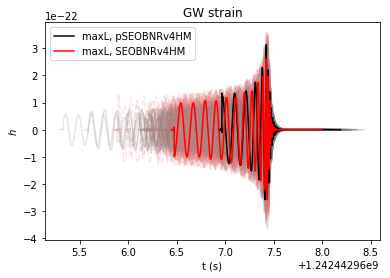

In [14]:
for i in range(0,100):
        
    #timenGR, hnGR = gen_wave(random.choice(datapSEO),1)
    #timeGR, hGR = gen_wave(random.choice(dataGRSEOB),0)

    plt.plot(timenGR[i], hnGR[i], color='grey', linestyle='-',alpha=.2)
    plt.plot(timeGR[i],  hGR[i], color='lightcoral', linestyle='--',alpha=.2)
    plt.ylabel('$h$')
    plt.xlabel('t (s)')
    plt.title('GW strain')

plt.plot(time_arraypSEOBmaL,hpSEOBmaL, color='black', linestyle='-',alpha=5,label='maxL, pSEOBNRv4HM')   
plt.plot(time_arraySEOBmaL,hSEOBmaL, color='red', linestyle='-',alpha=5,label='maxL, SEOBNRv4HM')   


plt.legend()
plt.show()

## zooming in around merger 

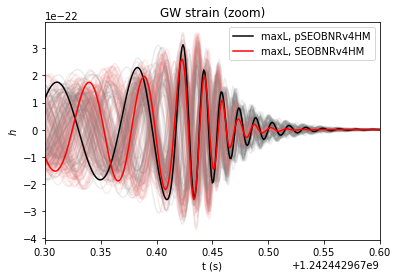

In [12]:
for i in range(0,100):
    
    #timenGR, hnGR = gen_wave(random.choice(datapSEO),1)
    #timeGR, hGR = gen_wave(random.choice(dataGRSEOB),0)

    plt.plot(timenGR[i], hnGR[i], color='grey', linestyle='-',alpha=.15)
    plt.plot(timeGR[i],  hGR[i], color='lightcoral', linestyle='-',alpha=.15)
    plt.ylabel('$h$')
    plt.xlabel('t (s)')
    plt.title('GW strain (zoom)')

plt.plot(time_arraypSEOBmaL,hpSEOBmaL, color='black', linestyle='-',alpha=5,label='maxL, pSEOBNRv4HM')   
plt.plot(time_arraySEOBmaL,hSEOBmaL, color='red', linestyle='-',alpha=5,label='maxL, SEOBNRv4HM')   


plt.xlim([1242442967.3,1242442967.6])
plt.legend()
plt.show()

## only SEOBNRv4HM

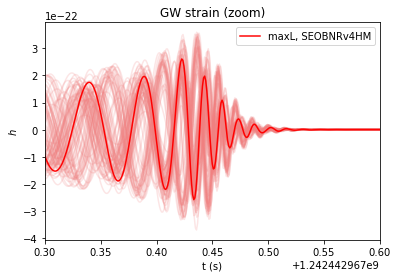

In [13]:
for i in range(0,100):
    
    #timeGR, hGR = gen_wave(random.choice(dataGRSEOB),0)
    plt.plot(timeGR[i],  hGR[i], color='lightcoral', linestyle='-',alpha=0.2)
    plt.ylabel('$h$')
    plt.xlabel('t (s)')
    plt.title('GW strain (zoom)')

plt.plot(time_arraySEOBmaL,hSEOBmaL, color='red', linestyle='-',alpha=5,label='maxL, SEOBNRv4HM')   


plt.xlim([1242442967.3,1242442967.6])
plt.legend()
plt.show()

## only pSEOBNRv4HM

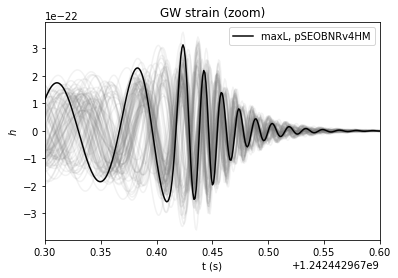

In [16]:
for i in range(0,100):
    
    #timenGR, hnGR = gen_wave(random.choice(datapSEO),1)
    plt.plot(timenGR[i], hnGR[i], color='grey', linestyle='-',alpha=.1)
    plt.ylabel('$h$')
    plt.xlabel('t (s)')
    plt.title('GW strain (zoom)')

plt.plot(time_arraypSEOBmaL,hpSEOBmaL, color='black', linestyle='-',alpha=5,label='maxL, pSEOBNRv4HM')   

#plt.ylim([-4*10**(-22),4*10**(-22)])
plt.xlim([1242442967.3,1242442967.6])
plt.legend()
plt.show()